In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("Imdb_movies_india.csv")
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [4]:
data.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981.000000,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,NaN,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,NaN,120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,NaN,240,2780,NaN,227,58,158,83,91
mean,NaN,-1987.012215,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,25.416689,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,-2022.000000,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,-2009.000000,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,-1991.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,-1968.000000,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [5]:
data_no_mv = data.drop(['Name','Year','Duration','Votes'],axis = 1)

In [6]:
data_no_mv = data_no_mv.dropna(axis=0)
data_no_mv = data_no_mv.reset_index(drop=True)
data_no_mv

,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
0,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,"Comedy, Romance",4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,"Comedy, Drama, Musical",4.7,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,"Drama, Romance, War",7.4,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,"Horror, Mystery, Thriller",5.6,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...
7553,"Action, Crime, Drama",5.3,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
7554,"Action, Crime, Drama",5.8,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
7555,Action,4.6,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
7556,"Action, Drama",4.5,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [7]:
data_no_mv.describe(include='all')

,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
count,7558,7558.000000,7558,7558,7558,7558
unique,416,NaN,2956,2415,2783,3031
top,Drama,NaN,Mahesh Bhatt,Jeetendra,Rekha,Pran
freq,1137,NaN,45,140,79,74
mean,NaN,5.811127,NaN,NaN,NaN,NaN
std,NaN,1.368255,NaN,NaN,NaN,NaN
min,NaN,1.100000,NaN,NaN,NaN,NaN
25%,NaN,4.900000,NaN,NaN,NaN,NaN
50%,NaN,6.000000,NaN,NaN,NaN,NaN
75%,NaN,6.800000,NaN,NaN,NaN,NaN


In [8]:
data_wd = pd.get_dummies(data = data_no_mv,columns = ['Genre','Director','Actor 1','Actor 2','Actor 3'])

In [9]:
data_wd

,Rating,Genre_Action,"Genre_Action, Adventure","Genre_Action, Adventure, Biography","Genre_Action, Adventure, Comedy","Genre_Action, Adventure, Crime","Genre_Action, Adventure, Drama","Genre_Action, Adventure, Family","Genre_Action, Adventure, Fantasy","Genre_Action, Adventure, History",...,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zebunissa,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zohra,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
0,7.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7553,5.3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7554,5.8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7555,4.6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7556,4.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


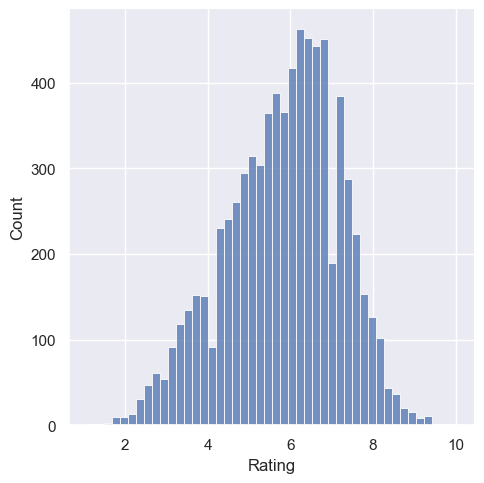

In [10]:
sns.displot(data_wd['Rating'])

In [11]:
x = data_wd.drop('Rating',axis=1)
y = data_wd['Rating']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)

In [17]:
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [18]:
model.predict(X_test)

array([5.78696983, 4.91919079, 6.43749787, ..., 5.78696983, 5.78696983,
       5.19044629])

In [25]:
model.score(X_train,y_train)

0.1402763935896919